In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
adv=pd.read_csv("advertising.csv")
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [6]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

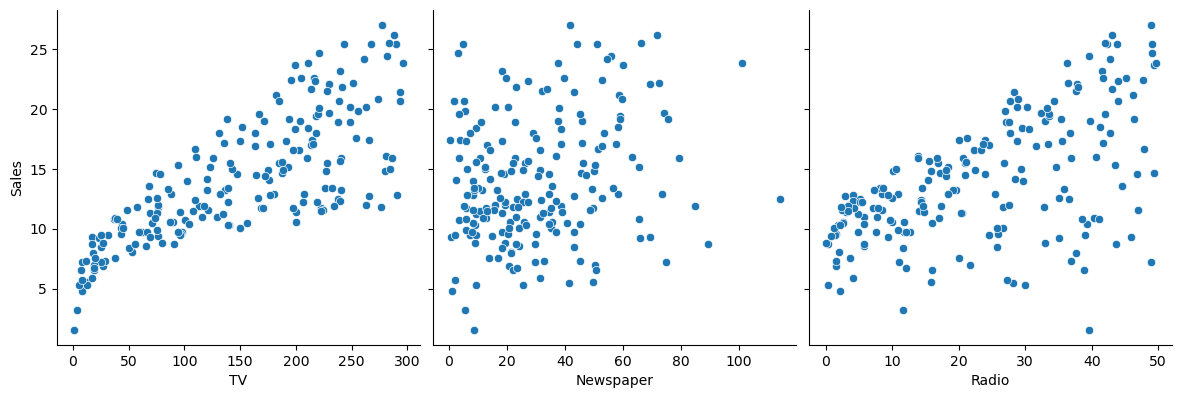

In [8]:
sns.pairplot(adv, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

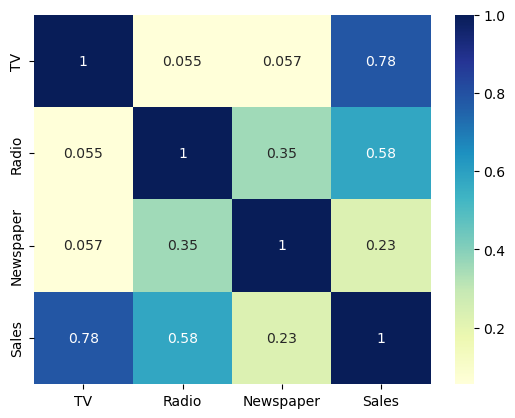

In [9]:
sns.heatmap(adv.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [10]:
# En yüksek Corr TV>Radio>Newspaper

In [11]:
x=adv[["TV","Radio","Newspaper"]]
y=adv["Sales"]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [14]:
y_train.head()


79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
Name: Sales, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [17]:
y_pred=model.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
r2_score(y_pred,y_test)

0.8791069137120032

In [20]:
import sklearn.metrics as metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.4607567168117606
MSE: 3.1740973539761064
RMSE: 1.7815996615334508


In [21]:
coef = pd.DataFrame(lr.coef_, x.columns, columns= ["coef"]).sort_values(by="coef",ascending=False)
coef

,coef
Radio,0.189195
TV,0.044730
Newspaper,0.002761


In [22]:
lr.intercept_

2.979067338122631

In [25]:
x_train=np.arange(0,len(x_train),1)

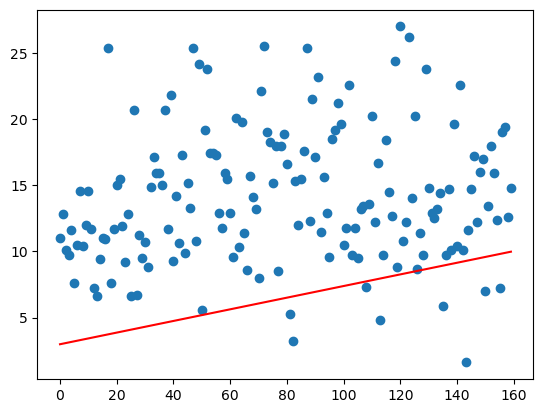

In [26]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 2.979 + 0.044*x_train, 'r')
plt.show()

In [27]:
import statsmodels.api as sm

In [28]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [29]:
lr.params

const    13.199930
x1        0.011322
dtype: float64

In [30]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.683
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.196
Time:                        19:33:20   Log-Likelihood:                -486.63
No. Observations:                 160   AIC:                             977.3
Df Residuals:                     158   BIC:                             983.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1999      0.802     16.453      0.0

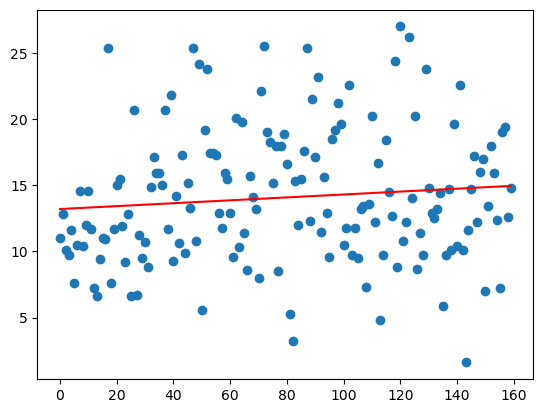

In [31]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 13.199 + 0.011*x_train, 'r')
plt.show()